In [1]:
# Example to Demonstrate the Union of Two Fuzzy Sets
A = dict()
B = dict()
Y = dict()

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}

print('The First Fuzzy Set is :', A)
print('The Second Fuzzy Set is :', B)


for A_key, B_key in zip(A, B):
	A_value = A[A_key]
	B_value = B[B_key]

	if A_value > B_value:
		Y[A_key] = A_value
	else:
		Y[B_key] = B_value

print('Fuzzy Set Union is :', Y)


The First Fuzzy Set is : {'a': 0.2, 'b': 0.3, 'c': 0.6, 'd': 0.6}
The Second Fuzzy Set is : {'a': 0.9, 'b': 0.9, 'c': 0.4, 'd': 0.5}
Fuzzy Set Union is : {'a': 0.9, 'b': 0.9, 'c': 0.6, 'd': 0.6}


In [2]:
# Example to Demonstrate Intersection of Two Fuzzy Sets
A = dict()
B = dict()
Y = dict()

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}

print('The First Fuzzy Set is :', A)
print('The Second Fuzzy Set is :', B)


for A_key, B_key in zip(A, B):
	A_value = A[A_key]
	B_value = B[B_key]

	if A_value < B_value:
		Y[A_key] = A_value
	else:
		Y[B_key] = B_value
print('Fuzzy Set Intersection is :', Y)


The First Fuzzy Set is : {'a': 0.2, 'b': 0.3, 'c': 0.6, 'd': 0.6}
The Second Fuzzy Set is : {'a': 0.9, 'b': 0.9, 'c': 0.4, 'd': 0.5}
Fuzzy Set Intersection is : {'a': 0.2, 'b': 0.3, 'c': 0.4, 'd': 0.5}


In [3]:
# Example to Demonstrate the Difference Between Two Fuzzy Sets
A = dict()
Y = dict()

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}

print('The Fuzzy Set is :', A)


for A_key in A:
  Y[A_key]= 1-A[A_key]

print('Fuzzy Set Complement is :', Y)


The Fuzzy Set is : {'a': 0.2, 'b': 0.3, 'c': 0.6, 'd': 0.6}
Fuzzy Set Complement is : {'a': 0.8, 'b': 0.7, 'c': 0.4, 'd': 0.4}


In [4]:
# Example to Demonstrate the Difference Between Two Fuzzy Sets
A = dict()
B = dict()
Y = dict()

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}

print('The First Fuzzy Set is :', A)
print('The Second Fuzzy Set is :', B)


for A_key, B_key in zip(A, B):
	A_value = A[A_key]
	B_value = B[B_key]
	B_value = 1 - B_value

	if A_value < B_value:
		Y[A_key] = A_value
	else:
		Y[B_key] = B_value

print('Fuzzy Set Difference is :', Y)


The First Fuzzy Set is : {'a': 0.2, 'b': 0.3, 'c': 0.6, 'd': 0.6}
The Second Fuzzy Set is : {'a': 0.9, 'b': 0.9, 'c': 0.4, 'd': 0.5}
Fuzzy Set Difference is : {'a': 0.09999999999999998, 'b': 0.09999999999999998, 'c': 0.6, 'd': 0.5}


Temperatura de entrada: 35¬∞C
N√≠vel de resfriamento recomendado: 65.48


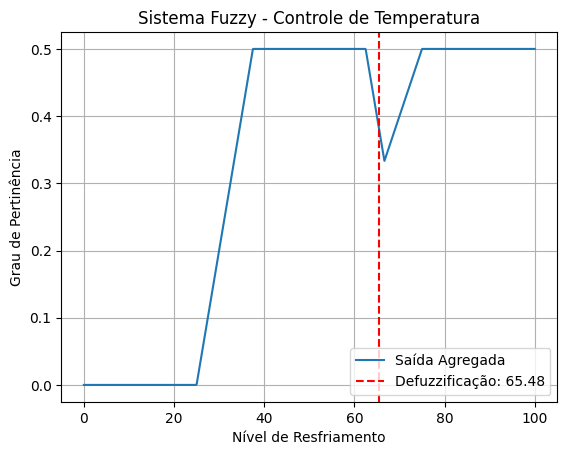

In [5]:
# @title L√≥gica Fuzzy com NumPy - Controle de Temperatura
import numpy as np
import matplotlib.pyplot as plt

# Fuzzifica√ß√£o - fun√ß√µes de pertin√™ncia
def temperatura_baixa(t):
    return np.clip((30 - t) / 10, 0, 1)

def temperatura_media(t):
    return np.clip((t - 20) / 10, 0, 1) * np.clip((40 - t) / 10, 0, 1)

def temperatura_alta(t):
    return np.clip((t - 30) / 10, 0, 1)

# Sa√≠da: resfriamento (n√≠vel de atua√ß√£o do ar condicionado, por exemplo)
def resfriamento_fraco(x):
    return np.clip((50 - x) / 50, 0, 1)

def resfriamento_moderado(x):
    return np.clip((x - 25) / 25, 0, 1) * np.clip((75 - x) / 25, 0, 1)

def resfriamento_forte(x):
    return np.clip((x - 50) / 50, 0, 1)

# Motor de Infer√™ncia
def inferencia_fuzzy(temperatura):
    mu_baixa = temperatura_baixa(temperatura)
    mu_media = temperatura_media(temperatura)
    mu_alta = temperatura_alta(temperatura)

    # Regras Fuzzy
    # Se temperatura √© baixa => resfriamento fraco
    # Se temperatura √© m√©dia => resfriamento moderado
    # Se temperatura √© alta  => resfriamento forte

    # Gera√ß√£o das fun√ß√µes de sa√≠da modificadas pelas pertin√™ncias
    x = np.linspace(0, 100, 1000)
    saida_fraco = np.minimum(resfriamento_fraco(x), mu_baixa)
    saida_moderado = np.minimum(resfriamento_moderado(x), mu_media)
    saida_forte = np.minimum(resfriamento_forte(x), mu_alta)

    # Agrega√ß√£o
    saida_agregada = np.maximum(np.maximum(saida_fraco, saida_moderado), saida_forte)

    # Defuzzifica√ß√£o - centro de gravidade
    valor_crisp = np.sum(x * saida_agregada) / np.sum(saida_agregada)

    return valor_crisp, x, saida_agregada

# Exemplo de uso
temperatura_entrada = 35
saida, x, y = inferencia_fuzzy(temperatura_entrada)

print(f"Temperatura de entrada: {temperatura_entrada}¬∞C")
print(f"N√≠vel de resfriamento recomendado: {saida:.2f}")

# Gr√°fico da sa√≠da fuzzy
plt.plot(x, y, label="Sa√≠da Agregada")
plt.axvline(saida, color='r', linestyle='--', label=f"Defuzzifica√ß√£o: {saida:.2f}")
plt.title("Sistema Fuzzy - Controle de Temperatura")
plt.xlabel("N√≠vel de Resfriamento")
plt.ylabel("Grau de Pertin√™ncia")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
!pip install scikit-fuzzy scikit-learn

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 920.8/920.8 kB 17.1 MB/s eta 0:00:00


# Descri√ß√£o:

- Gera dados sint√©ticos simulando um ambiente real.

- Normaliza os dados.

- Cria um sistema fuzzy com duas entradas (temperatura e umidade).

- Define regras fuzzy com base em conhecimento intuitivo.

- Estima o conforto t√©rmico com base nos valores de entrada.

- Mostra as curvas de pertin√™ncia e o resultado da defuzzifica√ß√£o.

N√≠vel de conforto estimado: 8.14


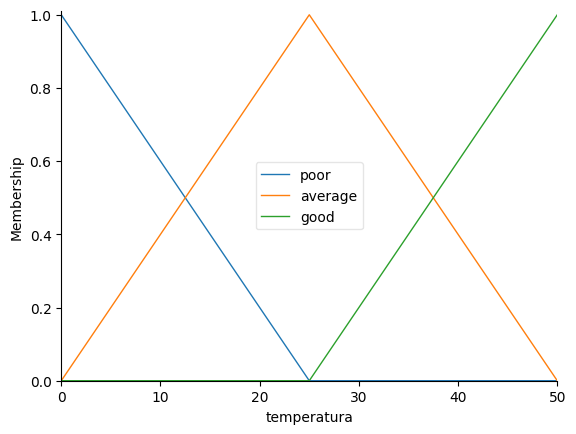

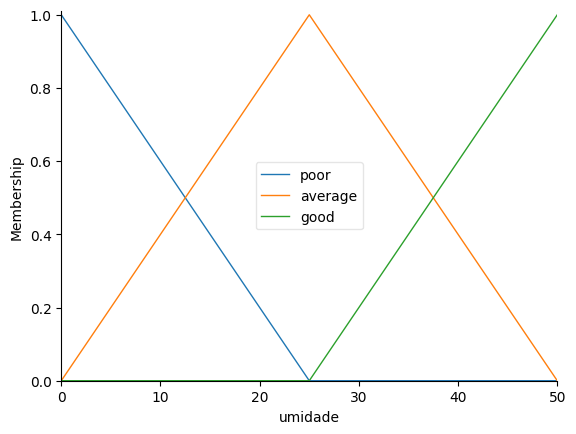

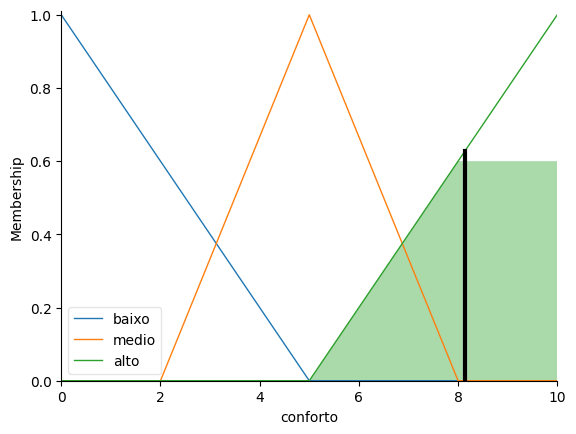

In [9]:
# @title Sistema Fuzzy com ajuste de dados (skfuzzy + sklearn)
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Gerar dados sint√©ticos: temperatura, umidade => conforto
X, y = make_regression(n_samples=300, n_features=2, noise=0.2)
scaler_X = MinMaxScaler(feature_range=(0, 50))
scaler_y = MinMaxScaler(feature_range=(0, 10))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Definir vari√°veis fuzzy
temperatura = ctrl.Antecedent(np.arange(0, 51, 1), 'temperatura')
umidade = ctrl.Antecedent(np.arange(0, 51, 1), 'umidade')
conforto = ctrl.Consequent(np.arange(0, 11, 1), 'conforto')

# Criar automaticamente fun√ß√µes de pertin√™ncia com aprendizado
temperatura.automf(3)  # ['poor', 'average', 'good']
umidade.automf(3)
conforto['baixo'] = fuzz.trimf(conforto.universe, [0, 0, 5])
conforto['medio'] = fuzz.trimf(conforto.universe, [2, 5, 8])
conforto['alto'] = fuzz.trimf(conforto.universe, [5, 10, 10])

# Definir regras fuzzy com base no bom senso
regras = [
    ctrl.Rule(temperatura['poor'] & umidade['poor'], conforto['medio']),
    ctrl.Rule(temperatura['average'] & umidade['average'], conforto['alto']),
    ctrl.Rule(temperatura['good'] & umidade['good'], conforto['baixo']),
    ctrl.Rule(temperatura['poor'] & umidade['good'], conforto['baixo']),
    ctrl.Rule(temperatura['good'] & umidade['poor'], conforto['alto']),
]

# Construir sistema fuzzy
sistema_conforto = ctrl.ControlSystem(regras)
simulador = ctrl.ControlSystemSimulation(sistema_conforto)

# Simular um exemplo
simulador.input['temperatura'] = 35
simulador.input['umidade'] = 25
simulador.compute()

print(f"N√≠vel de conforto estimado: {simulador.output['conforto']:.2f}")

# Plotar as superf√≠cies fuzzy
temperatura.view()
umidade.view()
conforto.view(sim=simulador)



### üî∏ 1. **Fuzzificador Singleton**

#### ‚úÖ O que √©:
- Uma fun√ß√£o de pertin√™ncia que assume **valor 1 em apenas um ponto espec√≠fico**, e **zero em todos os outros**.
- Visualmente, parece uma ‚Äúagulha‚Äù no gr√°fico ‚Äî um valor ‚Äúabsoluto‚Äù.

#### üß† Quando usar:
- Quando voc√™ **tem certeza absoluta** sobre o valor de entrada.
- Ideal para sistemas em que **a entrada √© sempre exata e constante** (ex: sensores digitais com valor fixo).
- **Computacionalmente muito leve**, pois simplifica os c√°lculos fuzzy.

#### üîß Exemplo:
```text
Se a temperatura √© exatamente 25¬∞C, ent√£o...
```

---

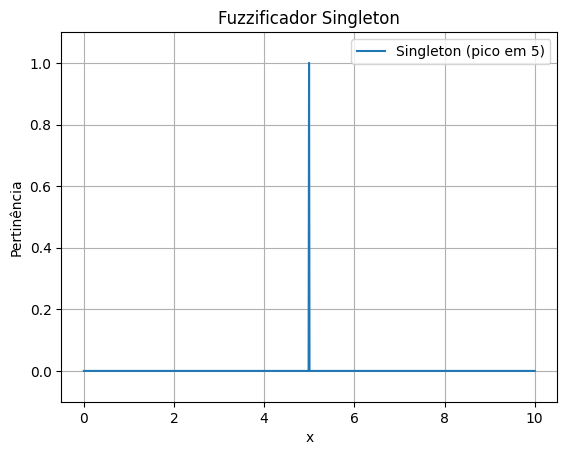

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 1000)
singleton = np.zeros_like(x)
singleton[np.abs(x - 5).argmin()] = 1  # pico em x=5

plt.plot(x, singleton, label='Singleton (pico em 5)')
plt.title("Fuzzificador Singleton")
plt.xlabel("x")
plt.ylabel("Pertin√™ncia")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.show()




### üî∏ 2. **Fuzzificador Gaussiano**

#### ‚úÖ O que √©:
- Uma fun√ß√£o de pertin√™ncia com **formato de sino** (curva normal), baseada na distribui√ß√£o gaussiana.
- Definida pelo centro (`c`) e pelo desvio padr√£o (`œÉ`, que controla a ‚Äúlargura‚Äù da curva).

#### üß† Quando usar:
- Quando os dados variam **suavemente** e t√™m **distribui√ß√£o cont√≠nua e natural**.
- √ötil quando h√° **incerteza gradual** ou medi√ß√µes ruidosas (ex: temperatura ambiente).
- Muito usado em **controle adaptativo** e quando voc√™ quer uma transi√ß√£o suave entre as regras.

#### üîß Exemplo:
```text
Pertin√™ncia m√°xima no centro (ex: 25¬∞C), mas ainda aceitamos valores pr√≥ximos (ex: 24.5¬∞C ou 25.7¬∞C) com peso reduzido.
```

---

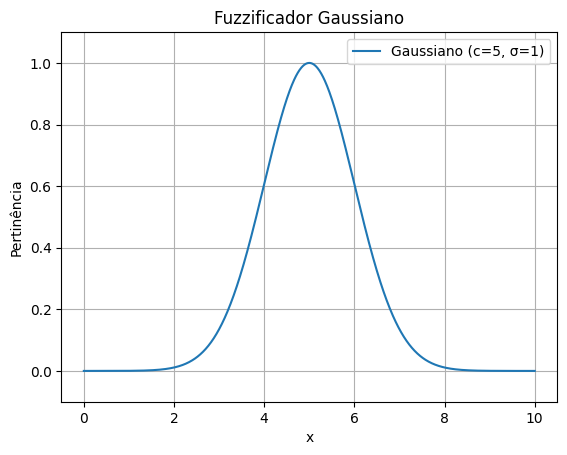

In [11]:
def gaussian(x, c, sigma):
    return np.exp(-((x - c)**2) / (2 * sigma**2))

x = np.linspace(0, 10, 1000)
gauss = gaussian(x, c=5, sigma=1)

plt.plot(x, gauss, label='Gaussiano (c=5, œÉ=1)')
plt.title("Fuzzificador Gaussiano")
plt.xlabel("x")
plt.ylabel("Pertin√™ncia")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.show()




### üî∏ 3. **Fuzzificador Triangular**

#### ‚úÖ O que √©:
- Uma fun√ß√£o com **forma de tri√¢ngulo**: sobe linearmente de 0 at√© 1, depois desce de 1 at√© 0.
- Definida por tr√™s pontos: in√≠cio (`a`), pico (`b`), fim (`c`).

#### üß† Quando usar:
- Quando voc√™ quer uma **representa√ß√£o simples** e eficiente de uma regi√£o fuzzy.
- Muito comum em sistemas de controle fuzzy **manuais**, pela facilidade de entendimento.
- √ötil quando voc√™ precisa de transi√ß√µes lineares e r√°pidas.

#### üîß Exemplo:
```text
‚ÄúTemperatura m√©dia‚Äù pode ser representada com pico em 25¬∞C, come√ßando a crescer a partir de 20¬∞C e caindo at√© 30¬∞C.
```

---

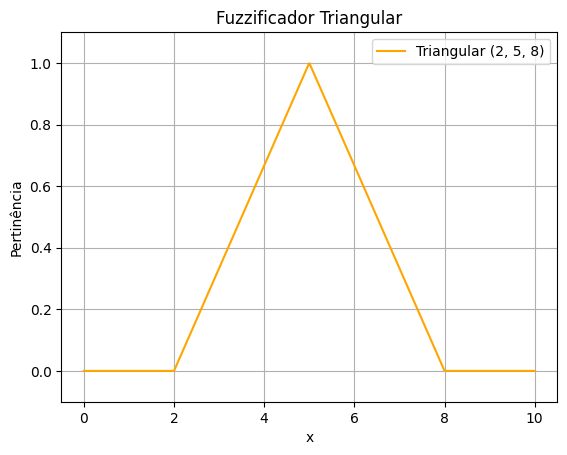

In [12]:
def triangular(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

x = np.linspace(0, 10, 1000)
tri = triangular(x, 2, 5, 8)

plt.plot(x, tri, label='Triangular (2, 5, 8)', color='orange')
plt.title("Fuzzificador Triangular")
plt.xlabel("x")
plt.ylabel("Pertin√™ncia")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.show()




### üî∏ 4. **Fuzzificador Trapezoidal**

#### ‚úÖ O que √©:
- Parecido com o triangular, mas com um ‚Äútopo plano‚Äù.
- Tem **dois pontos de subida**, **uma regi√£o de valor 1 constante**, e **dois pontos de descida**.
- Definido por quatro pontos: in√≠cio (`a`), come√ßo do topo (`b`), fim do topo (`c`), fim total (`d`).

#### üß† Quando usar:
- Quando voc√™ quer representar que **uma faixa de valores √© igualmente boa** (100% de pertin√™ncia).
- Mais robusto que o triangular para representar **regi√µes amplas com certeza total**.

#### üîß Exemplo:
```text
‚ÄúTemperatura confort√°vel‚Äù pode ser 100% verdadeira entre 23¬∞C e 27¬∞C, mas vai decrescendo fora disso.
```

---

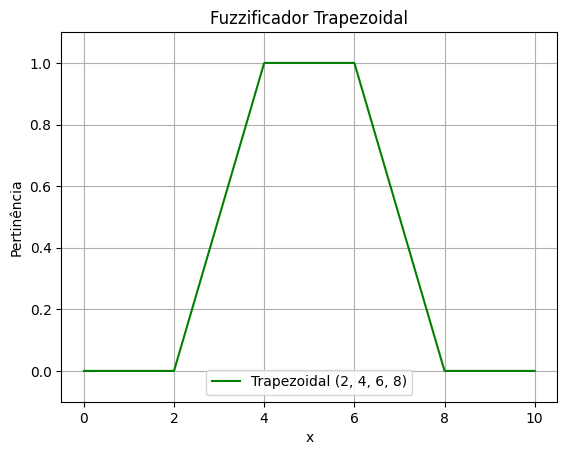

In [14]:
def trapezoidal(x, a, b, c, d):
    return np.maximum(np.minimum(np.minimum((x - a)/(b - a), 1), (d - x)/(d - c)), 0)

x = np.linspace(0, 10, 1000)
trap = trapezoidal(x, 2, 4, 6, 8)

plt.plot(x, trap, label='Trapezoidal (2, 4, 6, 8)', color='green')
plt.title("Fuzzificador Trapezoidal")
plt.xlabel("x")
plt.ylabel("Pertin√™ncia")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.show()




### ‚úÖ Comparando rapidamente:

| Tipo       | Forma          | Quando usar                                        | Simples? |
|------------|----------------|----------------------------------------------------|----------|
| Singleton  | Ponto √∫nico    | Entrada exata, alta certeza                        | ‚úÖ        |
| Gaussiano  | Curva suave    | Incerteza gradual, transi√ß√£o natural               | ‚ùå        |
| Triangular | Pico linear    | Representa√ß√£o simples, transi√ß√µes r√°pidas          | ‚úÖ‚úÖ       |
| Trapezoidal| Topo plano     | Faixa de certeza total, mais realista em dom√≠nios | ‚úÖ‚úÖ       |

---



## ‚öôÔ∏è **Desafio 1 ‚Äî Sistema Fuzzy para Controle de Vibra√ß√£o em Equipamentos Industriais**

### üéØ Desafio:
Desenvolver um sistema fuzzy que monitore e controle o n√≠vel de vibra√ß√£o em equipamentos industriais (como motores, bombas ou compressores), com o objetivo de **prever falhas** ou **ajustar par√¢metros operacionais automaticamente**.

### üì• Entradas sugeridas:
- **Amplitude de vibra√ß√£o** (em mm/s)
- **Temperatura do motor**
- **Tempo de opera√ß√£o cont√≠nua (em horas)**

### üì§ Sa√≠da esperada:
- **N√≠vel de risco de falha** (0 a 10)
- *(Opcional)* Sugest√£o de a√ß√£o: "parar equipamento", "reduzir carga", "acionar manuten√ß√£o preditiva"

---

### üîç Objetivos:
- Definir conjuntos fuzzy coerentes com o dom√≠nio industrial (ex: ‚Äúvibra√ß√£o leve‚Äù, ‚Äúvibra√ß√£o severa‚Äù).
- Explorar uso de **fuzzificadores do tipo trapezoidal** para tempo de opera√ß√£o (representando "zona segura" e "zona cr√≠tica").
- Testar diferentes combina√ß√µes de regras fuzzy baseadas em experi√™ncia ou tabelas t√©cnicas de manuten√ß√£o.
- Escolher e justificar o m√©todo de **defuzzifica√ß√£o**.
- Simular cen√°rios como:
  - Equipamento novo em alta temperatura
  - Equipamento antigo com vibra√ß√£o m√©dia
  - Opera√ß√£o prolongada com vibra√ß√£o crescente

---

### ‚öíÔ∏è Habilidades desenvolvidas:
- Modelagem fuzzy em contexto real de manuten√ß√£o industrial.
- Racioc√≠nio baseado em falhas e confiabilidade.
- Justificativa t√©cnica das decis√µes de modelagem.

---



# Desafio: 2 ‚Äî Sistema de Dire√ß√£o Aut√¥noma para Curvas
üéØ Modelar um sistema fuzzy que defina a velocidade ideal em curvas, baseado em:

√Çngulo da curva

Condi√ß√£o da pista (seca, molhada, com areia)

Velocidade atual do ve√≠culo

üîç Objetivos:
Criar vari√°veis fuzzy realistas para cada entrada.

Explorar fun√ß√µes de pertin√™ncia irregulares (ex: fuzzy assim√©trico para curvas).

Discutir a viabilidade de usar um fuzzificador singleton para condi√ß√£o da pista.

Explicar como a modelagem ajuda a evitar acidentes ou instabilidade.

Apresentar gr√°ficos com simula√ß√µes para diferentes entradas.

#üåø Exerc√≠cio 3 ‚Äî Irriga√ß√£o Inteligente em Agricultura de Precis√£o
üéØ Desafio:
Projetar um sistema fuzzy que defina quanto irrigar uma planta√ß√£o, baseado em:

Umidade do solo

Previs√£o de chuva

Est√°gio de crescimento da planta

üîç Objetivos:
Definir as vari√°veis e conjuntos fuzzy.

Justificar o uso de fuzzificadores com topo plano (trapezoidal) para a fase de crescimento.

Simular e analisar como o sistema se adapta a:

Solo seco com previs√£o de chuva.

Solo √∫mido em fase de flora√ß√£o.

Comparar o sistema fuzzy com um sistema baseado em limiares fixos (thresholding).

# Desafio Resolvido como exemplo

## üîß Exerc√≠cio 1 ‚Äî Sistema de Ar Condicionado Inteligente
üéØ Desafio:
Criar um sistema fuzzy para controlar a pot√™ncia do ar condicionado de um ambiente com base em:

Temperatura

Umidade

N√∫mero de pessoas no ambiente

üîç Objetivos:
Modelar as vari√°veis lingu√≠sticas e os conjuntos fuzzy para cada entrada.

Justificar a escolha dos fuzzificadores (gaussiano, triangular, trapezoidal...).

Definir as regras fuzzy.

Escolher a estrat√©gia de defuzzifica√ß√£o mais adequada.

Mostrar em gr√°ficos a sa√≠da para diferentes situa√ß√µes (ex: sala vazia e quente vs sala cheia e fria).

Cen√°rio 1 - Entrada: {'temperatura': 30, 'umidade': 35, 'pessoas': 15}
Pot√™ncia do ar condicionado: 8.40



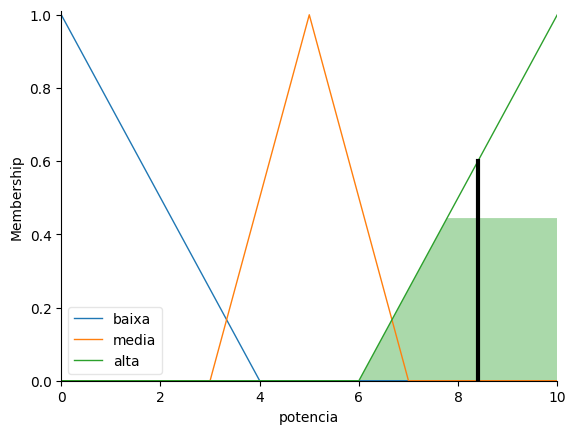

Cen√°rio 2 - Entrada: {'temperatura': 22, 'umidade': 50, 'pessoas': 5}
Pot√™ncia do ar condicionado: 3.60



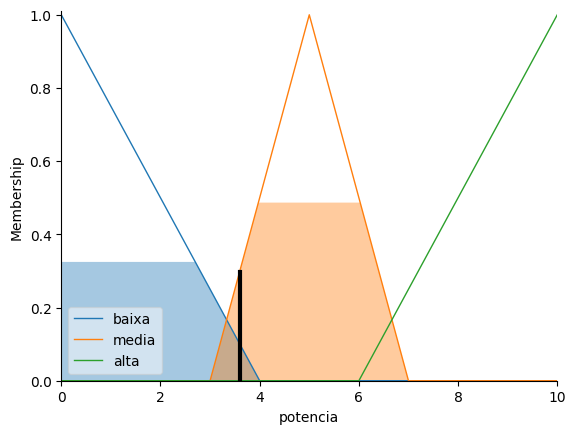

Cen√°rio 3 - Entrada: {'temperatura': 28, 'umidade': 70, 'pessoas': 3}
Pot√™ncia do ar condicionado: 2.70



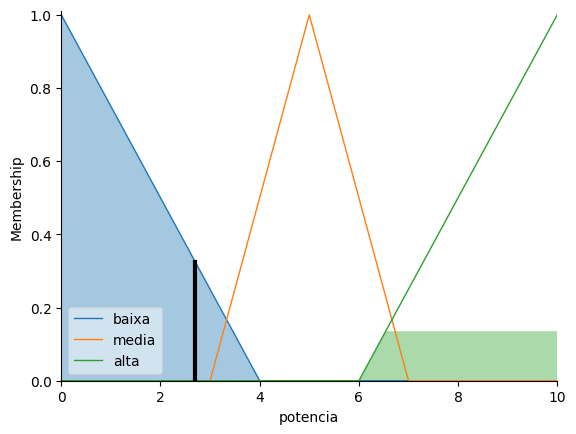

In [16]:
# Sistema Fuzzy para Controle de Ar Condicionado Inteligente

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Definir vari√°veis fuzzy

# Universo das vari√°veis
x_temp = np.arange(16, 36, 1)         # Temperatura (¬∞C)
x_umidade = np.arange(20, 81, 1)      # Umidade (%RH)
x_pessoas = np.arange(0, 21, 1)       # N√∫mero de pessoas
x_potencia = np.arange(0, 11, 1)      # Pot√™ncia do ar condicionado (0 a 10)

# Entradas
temperatura = ctrl.Antecedent(x_temp, 'temperatura')
umidade = ctrl.Antecedent(x_umidade, 'umidade')
pessoas = ctrl.Antecedent(x_pessoas, 'pessoas')

# Sa√≠da
potencia = ctrl.Consequent(x_potencia, 'potencia')

# 2. Conjuntos fuzzy e justificativa:
# - Temperatura: triangular (varia√ß√£o linear, resposta sens√≠vel)
# - Umidade: trapezoidal (faixas bem definidas de conforto)
# - Pessoas: gaussiano (varia√ß√£o natural de ocupa√ß√£o)

# Temperatura (¬∞C)
temperatura['fria'] = fuzz.trimf(x_temp, [16, 16, 22])
temperatura['confortavel'] = fuzz.trimf(x_temp, [20, 24, 28])
temperatura['quente'] = fuzz.trimf(x_temp, [26, 35, 35])

# Umidade (%RH)
umidade['seca'] = fuzz.trapmf(x_umidade, [20, 20, 30, 45])
umidade['ideal'] = fuzz.trapmf(x_umidade, [40, 45, 55, 60])
umidade['umida'] = fuzz.trapmf(x_umidade, [55, 70, 80, 80])

# Pessoas (n√∫mero)
pessoas['poucas'] = fuzz.gaussmf(x_pessoas, 2, 2)
pessoas['media'] = fuzz.gaussmf(x_pessoas, 8, 2.5)
pessoas['cheia'] = fuzz.gaussmf(x_pessoas, 15, 2.5)

# Pot√™ncia de sa√≠da
potencia['baixa'] = fuzz.trimf(x_potencia, [0, 0, 4])
potencia['media'] = fuzz.trimf(x_potencia, [3, 5, 7])
potencia['alta'] = fuzz.trimf(x_potencia, [6, 10, 10])

# 3. Definir regras fuzzy
regras = [
    ctrl.Rule(temperatura['quente'] & umidade['seca'] & pessoas['cheia'], potencia['alta']),
    ctrl.Rule(temperatura['quente'] & umidade['ideal'], potencia['media']),
    ctrl.Rule(temperatura['confortavel'] & pessoas['media'], potencia['media']),
    ctrl.Rule(temperatura['fria'] | umidade['umida'], potencia['baixa']),
    ctrl.Rule(pessoas['poucas'] & temperatura['confortavel'], potencia['baixa']),
    ctrl.Rule(temperatura['quente'] & pessoas['media'], potencia['alta']),
]

# 4. Construir o sistema fuzzy
sistema = ctrl.ControlSystem(regras)
simulador = ctrl.ControlSystemSimulation(sistema)

# 5. Simular alguns casos
cenarios = [
    {"temperatura": 30, "umidade": 35, "pessoas": 15},  # quente e cheio
    {"temperatura": 22, "umidade": 50, "pessoas": 5},   # confort√°vel e m√©dia ocupa√ß√£o
    {"temperatura": 28, "umidade": 70, "pessoas": 3},   # quente mas √∫mido
]

for i, entrada in enumerate(cenarios):
    simulador.input['temperatura'] = entrada['temperatura']
    simulador.input['umidade'] = entrada['umidade']
    simulador.input['pessoas'] = entrada['pessoas']
    simulador.compute()

    print(f"Cen√°rio {i+1} - Entrada: {entrada}")
    print(f"Pot√™ncia do ar condicionado: {simulador.output['potencia']:.2f}\n")

    potencia.view(sim=simulador)
    plt.show()